In [1]:
import pathlib
from rdkit import Chem
from openfe.setup import SmallMoleculeComponent
from openfe.setup.ligand_network_planning import generate_radial_network
from openfe.setup.lomap_mapper import LomapAtomMapper
from openfe.setup.lomap_scorers import default_lomap_score

# Pick up ligand paths, load in rdkit and feed to SmallMoleculeComponent
path = pathlib.Path('../02_ligands/')

ligand_mols = []  # List of SmallMoleculeComponents

for p in path.rglob('*/crd/*sdf'):
    mol = [entry for entry in Chem.SDMolSupplier(str(p), removeHs=False)]
    ligand_mols.append(SmallMoleculeComponent(mol[0]))

In [262]:
lomap_mapper = LomapAtomMapper(time=60, threed=True, element_change=False, max3d=1)

In [357]:
molA = [ligand for ligand in ligand_mols if ligand.name == 'lig_CHEMBL1082248'][0]
molB = [ligand for ligand in ligand_mols if ligand.name == 'lig_CHEMBL1082249'][0]

In [358]:
network = generate_radial_network(ligands=[molB,], central_ligand=molA,
                                  mappers=[lomap_mapper,],
                                  scorer=default_lomap_score)

In [359]:
from openfe_benchmarks.utils import show_edge_3D
edge = [i for i in network.edges][0]

In [367]:
show_edge_3D(edge, shift=(15, 0, 0))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [361]:
import numpy as np

np.any(edge.get_distances() > 1)

True

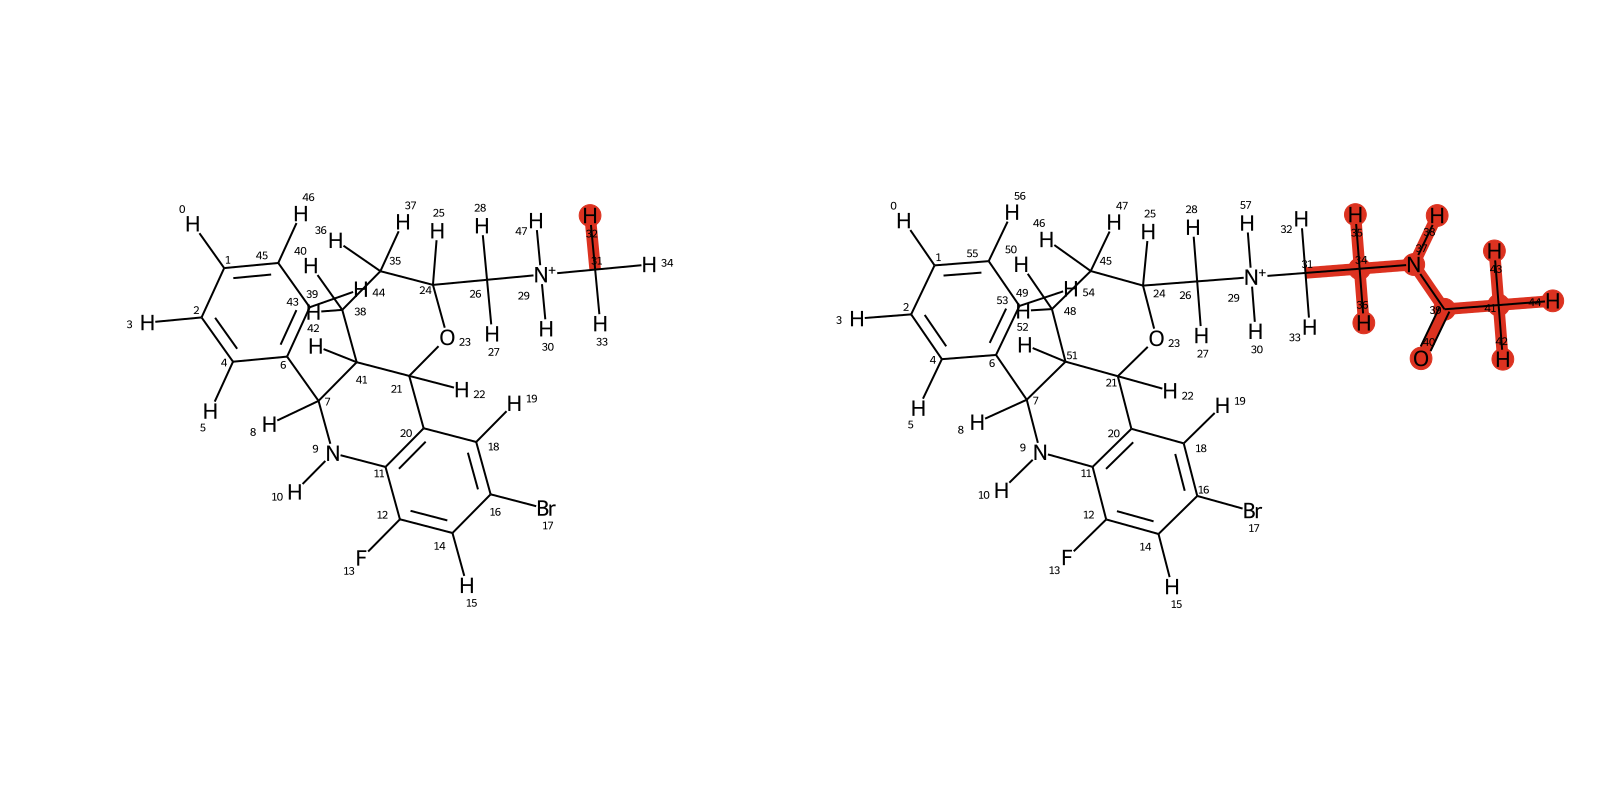

In [362]:
d2d = Chem.Draw.rdMolDraw2D.MolDraw2DCairo(
            2 * 800, 1 * 800, 800, 800)
edge._ipython_display_(d2d=d2d)

In [366]:
edge.molA_to_molB[33] = 33

In [292]:
edge.molA_to_molB[44] = 41
edge.molA_to_molB[45] = 42
edge.molA_to_molB[48] = 45
edge.molA_to_molB[47] = 44
edge.molA_to_molB[50] = 47
edge.molA_to_molB[51] = 48
edge.molA_to_molB.pop(73)

50

In [300]:
edge.molA_to_molB.pop(48)
edge.molA_to_molB.pop(47)
edge.molA_to_molB.pop(50)
edge.molA_to_molB.pop(51)

48

In [301]:
edge.molA_to_molB

{0: 0,
 1: 1,
 2: 62,
 3: 63,
 4: 60,
 5: 61,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 27: 21,
 28: 22,
 29: 23,
 30: 24,
 31: 25,
 32: 26,
 33: 27,
 34: 28,
 35: 29,
 36: 30,
 37: 31,
 38: 32,
 40: 37,
 41: 38,
 42: 39,
 43: 40,
 44: 41,
 45: 42,
 46: 43,
 49: 46,
 52: 49,
 61: 52,
 62: 53,
 63: 54,
 64: 55,
 65: 56,
 66: 57,
 67: 58,
 68: 59,
 69: 4,
 70: 5,
 71: 2,
 72: 3}

In [302]:
molA = edge.molA.to_rdkit()
molB = edge.molB.to_rdkit()

In [303]:
Chem.rdMolAlign.CalcRMS(molB, molA, map=[list(zip(edge.molA_to_molB.values(), edge.molA_to_molB.keys()))])

0.3110691447333399

In [304]:
import py3Dmol
pview = py3Dmol.view(width=600, height=600)
pview.addModel(Chem.MolToMolBlock(molA))
pview.addModel(Chem.MolToMolBlock(molB))
pview.setStyle({'stick':{'colorscheme':'cyanCarbon'}})
pview.center()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Manually adjusted edges

The following edges have mapped atom positions differing by more than 1 A:
lig_CHEMBL1085666_lig_CHEMBL1093088 - pop(31,6)
lig_CHEMBL1084143_lig_CHEMBL1084678
44 - 42, replace to 41
45 - 41, replace to 42
48 - 44, replace to 45
47 - 45, replace to 44
50 - 48, replace to 47
51 - 47, replace to 48
pop 73
lig_CHEMBL1084677_lig_CHEMBL1096003
pop (44,61), (47,44), (46,42), (48,43)
lig_CHEMBL1077227_lig_CHEMBL1086410
pop(56,42)
lig_CHEMBL1084677_lig_CHEMBL1084678
- acceptable
lig_CHEMBL1082248_lig_CHEMBL1082249
- acceptable